In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import datetime 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False
nameArray = ['박하원','하효은','이민우','강명균','유지원','손정민','이채별']
colors = ['tab:blue', 'tab:orange', 'tab:green']

In [10]:
sleep = pd.read_csv("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/수면_활동_부재_수집데이터/SleepData.csv")
active = pd.read_csv("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/수면_활동_부재_수집데이터/ActiveData.csv")
absence = pd.read_csv("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/수면_활동_부재_수집데이터/AbsenceData.csv")

In [11]:
motQuntaile50Array = []
test = sleep
for i in range(7):
    motQuntaile50Array.append(test[(test['userId'] == i) & (test['status'] == 4)]['mot'].quantile(.5))

수면 성능 평가

In [39]:
test = sleep
test['label'] = 5

cond_1 = (
    (test['hr_conv'] == 0)
    & (test['br_conv'] == 0)
    & (test['mot'] == 0 )
)

test.loc[cond_1, 'label'] = 0

cond_2 = (
    (test['light'].rolling(10).sum() < 10)
    & (test['label'] != 0)
)

test.loc[cond_2, 'label'] = 4
test.loc[test['label'] == 5, 'label'] = 1


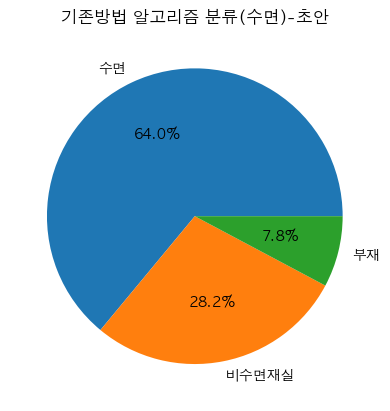

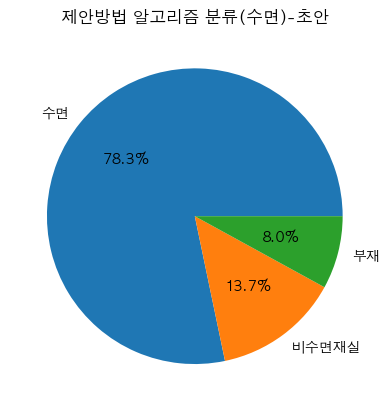

In [40]:
statusSleep = len(test[test['status'] == 4])/len(test)
statusAbsence = len(test[test['status'] == 0])/len(test)
statusActive = len(test[(test['status'] == 2) | (test['status'] == 3)])/len(test)
plt.pie([statusSleep, statusActive, statusAbsence], labels=['수면','비수면재실', '부재'], autopct='%.1f%%')
plt.title('기존방법 알고리즘 분류(수면)-초안')
# plt.savefig("./figs/absence(하틴루).png", bbox_inches='tight')
plt.show()

labelSleep = len(test[test['label'] == 4])/len(test)
labelAbsence = len(test[test['label'] == 0])/len(test)
labelActive = len(test[test['label'] == 1])/len(test)
plt.pie([labelSleep, labelActive, labelAbsence], labels=['수면', '비수면재실', '부재'], autopct='%.1f%%')
plt.title('제안방법 알고리즘 분류(수면)-초안')
# plt.savefig("./figs/absence(강남대).png", bbox_inches='tight')
plt.show()

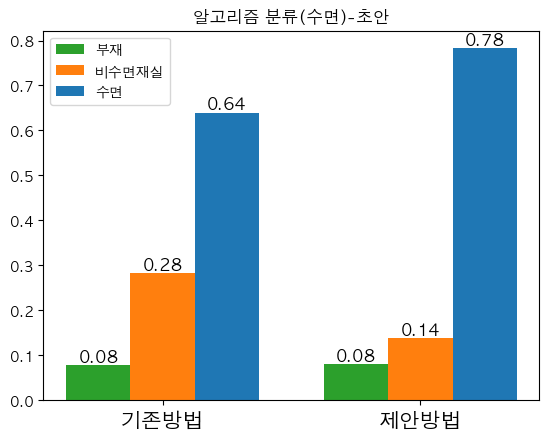

In [41]:
X1=[1,3]
data1 = [statusAbsence,labelAbsence]
bar1 = plt.bar(X1, data1,color='tab:green',width=0.5)

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)    

X2=[1+0.5,3+0.5]
data2 = [statusActive,labelActive]
bar2 = plt.bar(X2, data2,color='tab:orange',width=0.5)

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)  

X3=[1+1,3+1]
data3 = [statusSleep,labelSleep]
bar3 = plt.bar(X3, data3,color='tab:blue',width=0.5)

for rect in bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)  

ticklabel=['기존방법','제안방법']
plt.title('알고리즘 분류(수면)-초안')
plt.xticks(X2,ticklabel,fontsize=15,rotation=0)
plt.legend(['부재','비수면재실','수면'])


In [42]:
#학생별 수치 확인
for i in range(7):
    test2 = test[test['userId'] == i]
    print(nameArray[i])
    print(f"기존Status 부재 비율:{len(test2[test2['status'] == 0])/len(test2)}")
    print(f"기존Status 비수면재실 비율: {len(test2[(test2['status'] == 2) | (test2['status'] == 3)])/len(test2)}")
    print(f"기존Status 수면 비율: {len(test2[test2['status'] == 4])/len(test2)}")
    print("\n")
    print(f"newStatus 부재 비율:{len(test2[test2['label'] == 0])/len(test2)}")
    print(f"newStatus 비수면재실 비율: {len(test2[test2['label'] == 1])/len(test2)}")
    print(f"newStatus 수면 비율: {len(test2[test2['label'] == 4])/len(test2)}")
    print("\n\n")

박하원
기존Status 부재 비율:0.09290873276428102
기존Status 비수면재실 비율: 0.4980302035456336
기존Status 수면 비율: 0.4090610636900854


newStatus 부재 비율:0.12081418253447143
newStatus 비수면재실 비율: 0.06631648063033486
newStatus 수면 비율: 0.8128693368351937



하효은
기존Status 부재 비율:0.0
기존Status 비수면재실 비율: 0.008362369337979094
기존Status 수면 비율: 0.9916376306620209


newStatus 부재 비율:0.0013937282229965157
newStatus 비수면재실 비율: 0.005574912891986063
newStatus 수면 비율: 0.9930313588850174



이민우
기존Status 부재 비율:0.0
기존Status 비수면재실 비율: 0.06596701649175413
기존Status 수면 비율: 0.9340329835082459


newStatus 부재 비율:0.0
newStatus 비수면재실 비율: 0.5367316341829086
newStatus 수면 비율: 0.46326836581709147



강명균
기존Status 부재 비율:0.0
기존Status 비수면재실 비율: 0.0
기존Status 수면 비율: 1.0


newStatus 부재 비율:0.0
newStatus 비수면재실 비율: 0.0
newStatus 수면 비율: 1.0



유지원
기존Status 부재 비율:0.21830314585319352
기존Status 비수면재실 비율: 0.5810295519542421
기존Status 수면 비율: 0.20066730219256435


newStatus 부재 비율:0.13679694947569113
newStatus 비수면재실 비율: 0.05862726406101049
newStatus 수면 비율: 0.804575786

비수면 재실 성능 평가

In [43]:
test = active
test['label'] = 5

cond_1 = (
    (test['hr_conv'] == 0)
    & (test['br_conv'] == 0)
    & (test['mot'] == 0 )
)

test.loc[cond_1, 'label'] = 0

cond_2 = (
    (test['light'].rolling(10).sum() < 10)
    & (test['label'] != 0)
)

test.loc[cond_2, 'label'] = 4
test.loc[test['label'] == 5, 'label'] = 1


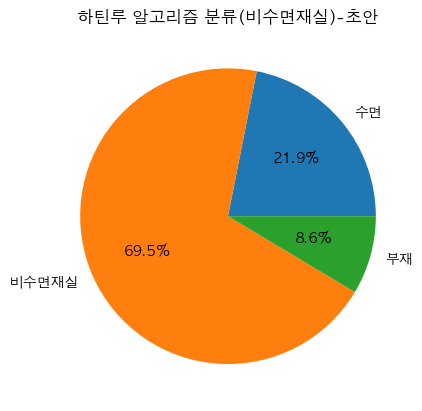

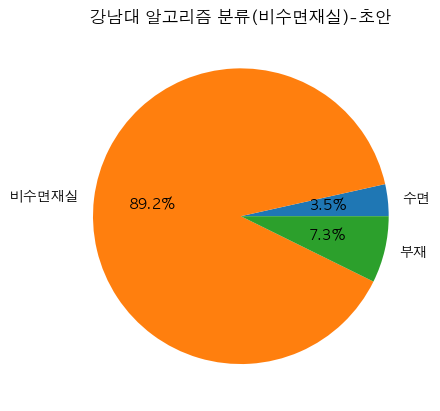

In [44]:
#하틴루 알고리즘, 강남대 알고리즘 전체 비교 시각화

statusSleep = len(test[test['status'] == 4])/len(test)
statusAbsence = len(test[test['status'] == 0])/len(test)
statusActive = len(test[(test['status'] == 2) | (test['status'] == 3)])/len(test)
plt.pie([statusSleep, statusActive, statusAbsence], labels=['수면','비수면재실', '부재'], autopct='%.1f%%')
plt.title('하틴루 알고리즘 분류(비수면재실)-초안')
# plt.savefig("./figs/absence(하틴루).png", bbox_inches='tight')
plt.show()

labelSleep = len(test[test['label'] == 4])/len(test)
labelAbsence = len(test[test['label'] == 0])/len(test)
labelActive = len(test[test['label'] == 1])/len(test)
plt.pie([labelSleep, labelActive, labelAbsence], labels=['수면', '비수면재실', '부재'], autopct='%.1f%%')
plt.title('강남대 알고리즘 분류(비수면재실)-초안')
# plt.savefig("./figs/absence(강남대).png", bbox_inches='tight')
plt.show()

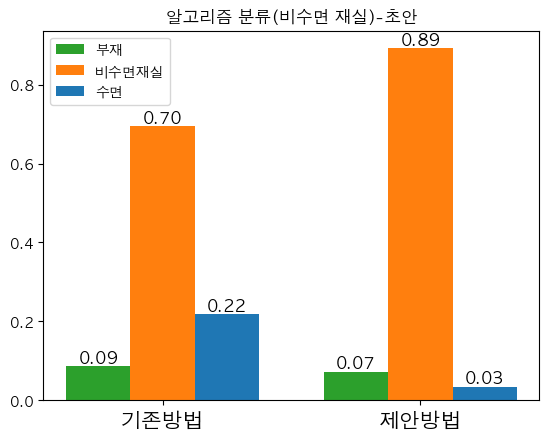

In [45]:
X1=[1,3]
data1 = [statusAbsence,labelAbsence]
bar1 = plt.bar(X1, data1,color='tab:green',width=0.5)

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)    

X2=[1+0.5,3+0.5]
data2 = [statusActive,labelActive]
bar2 = plt.bar(X2, data2,color='tab:orange',width=0.5)

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)  

X3=[1+1,3+1]
data3 = [statusSleep,labelSleep]
bar3 = plt.bar(X3, data3,color='tab:blue',width=0.5)

for rect in bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)  

ticklabel=['기존방법','제안방법']
plt.title('알고리즘 분류(비수면 재실)-초안')
plt.xticks(X2,ticklabel,fontsize=15,rotation=0)
plt.legend(['부재','비수면재실','수면'])


In [46]:
#학생별 수치 확인
for i in range(7):
    test2 = test[test['userId'] == i]
    print(nameArray[i])
    print(f"기존Status 부재 비율:{len(test2[test2['status'] == 0])/len(test2)}")
    print(f"기존Status 비수면재실 비율: {len(test2[(test2['status'] == 2) | (test2['status'] == 3)])/len(test2)}")
    print(f"기존Status 수면 비율: {len(test2[test2['status'] == 4])/len(test2)}")
    print("\n")
    print(f"newStatus 부재 비율:{len(test2[test2['label'] == 0])/len(test2)}")
    print(f"newStatus 비수면재실 비율: {len(test2[test2['label'] == 1])/len(test2)}")
    print(f"newStatus 수면 비율: {len(test2[test2['label'] == 4])/len(test2)}")
    print("\n\n")

박하원
기존Status 부재 비율:0.002354788069073783
기존Status 비수면재실 비율: 0.4835164835164835
기존Status 수면 비율: 0.5141287284144427


newStatus 부재 비율:0.004709576138147566
newStatus 비수면재실 비율: 0.9952904238618524
newStatus 수면 비율: 0.0



하효은
기존Status 부재 비율:0.0
기존Status 비수면재실 비율: 0.5205882352941177
기존Status 수면 비율: 0.47941176470588237


newStatus 부재 비율:0.0
newStatus 비수면재실 비율: 1.0
newStatus 수면 비율: 0.0



이민우
기존Status 부재 비율:0.0
기존Status 비수면재실 비율: 0.9050925925925926
기존Status 수면 비율: 0.09490740740740741


newStatus 부재 비율:0.0
newStatus 비수면재실 비율: 0.9537037037037037
newStatus 수면 비율: 0.046296296296296294



강명균
기존Status 부재 비율:0.0
기존Status 비수면재실 비율: 0.776500638569604
기존Status 수면 비율: 0.22349936143039592


newStatus 부재 비율:0.0
newStatus 비수면재실 비율: 1.0
newStatus 수면 비율: 0.0



유지원
기존Status 부재 비율:0.033707865168539325
기존Status 비수면재실 비율: 0.9662921348314607
기존Status 수면 비율: 0.0


newStatus 부재 비율:0.006741573033707865
newStatus 비수면재실 비율: 0.9430711610486892
newStatus 수면 비율: 0.050187265917602995



손정민
기존Status 부재 비율:0.307773109243697

부재 성능 평가

In [47]:
test = absence
test['label'] = 5

cond_1 = (
    (test['hr_conv'] == 0)
    & (test['br_conv'] == 0)
    & (test['mot'] == 0 )
)

test.loc[cond_1, 'label'] = 0

cond_2 = (
    (test['light'].rolling(10).sum() < 10)
    & (test['label'] != 0)
)

test.loc[cond_2, 'label'] = 4
test.loc[test['label'] == 5, 'label'] = 1


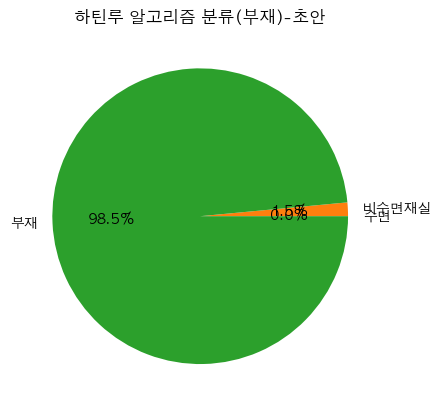

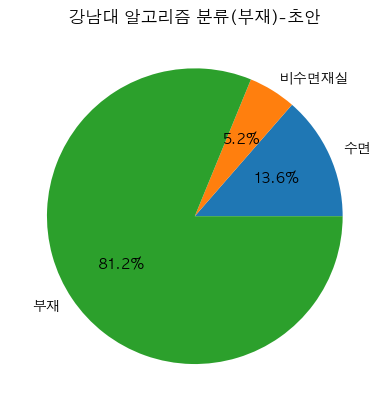

In [48]:
#하틴루 알고리즘, 강남대 알고리즘 전체 비교 시각화

statusSleep = len(test[test['status'] == 4])/len(test)
statusAbsence = len(test[test['status'] == 0])/len(test)
statusActive = len(test[(test['status'] == 2) | (test['status'] == 3)])/len(test)
plt.pie([statusSleep, statusActive, statusAbsence], labels=['수면','비수면재실', '부재'], autopct='%.1f%%')
plt.title('하틴루 알고리즘 분류(부재)-초안')
# plt.savefig("./figs/absence(하틴루).png", bbox_inches='tight')
plt.show()

labelSleep = len(test[test['label'] == 4])/len(test)
labelAbsence = len(test[test['label'] == 0])/len(test)
labelActive = len(test[test['label'] == 1])/len(test)
plt.pie([labelSleep, labelActive, labelAbsence], labels=['수면', '비수면재실', '부재'], autopct='%.1f%%')
plt.title('강남대 알고리즘 분류(부재)-초안')
# plt.savefig("./figs/absence(강남대).png", bbox_inches='tight')
plt.show()

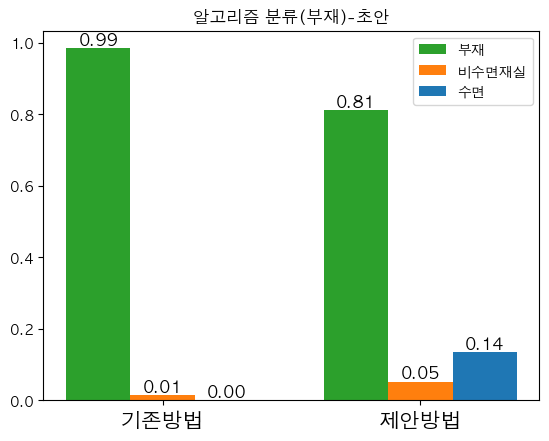

In [49]:
X1=[1,3]
data1 = [statusAbsence,labelAbsence]
bar1 = plt.bar(X1, data1,color='tab:green',width=0.5)

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)    

X2=[1+0.5,3+0.5]
data2 = [statusActive,labelActive]
bar2 = plt.bar(X2, data2,color='tab:orange',width=0.5)

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)  

X3=[1+1,3+1]
data3 = [statusSleep,labelSleep]
bar3 = plt.bar(X3, data3,color='tab:blue',width=0.5)

for rect in bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)  

ticklabel=['기존방법','제안방법']
plt.title('알고리즘 분류(부재)-초안')
plt.xticks(X2,ticklabel,fontsize=15,rotation=0)
plt.legend(['부재','비수면재실','수면'])


In [50]:
#학생별 수치 확인
for i in range(7):
    test2 = test[test['userId'] == i]
    print(nameArray[i])
    print(f"기존Status 부재 비율:{len(test2[test2['status'] == 0])/len(test2)}")
    print(f"기존Status 비수면재실 비율: {len(test2[(test2['status'] == 2) | (test2['status'] == 3)])/len(test2)}")
    print(f"기존Status 수면 비율: {len(test2[test2['status'] == 4])/len(test2)}")
    print("\n")
    print(f"newStatus 부재 비율:{len(test2[test2['label'] == 0])/len(test2)}")
    print(f"newStatus 비수면재실 비율: {len(test2[test2['label'] == 1])/len(test2)}")
    print(f"newStatus 수면 비율: {len(test2[test2['label'] == 4])/len(test2)}")
    print("\n\n")

박하원
기존Status 부재 비율:0.9726890756302521
기존Status 비수면재실 비율: 0.0273109243697479
기존Status 수면 비율: 0.0


newStatus 부재 비율:0.8392857142857143
newStatus 비수면재실 비율: 0.005252100840336135
newStatus 수면 비율: 0.15546218487394958



하효은
기존Status 부재 비율:1.0
기존Status 비수면재실 비율: 0.0
기존Status 수면 비율: 0.0


newStatus 부재 비율:0.9127906976744186
newStatus 비수면재실 비율: 0.029069767441860465
newStatus 수면 비율: 0.05813953488372093



이민우
기존Status 부재 비율:1.0
기존Status 비수면재실 비율: 0.0
기존Status 수면 비율: 0.0


newStatus 부재 비율:0.9880952380952381
newStatus 비수면재실 비율: 0.011904761904761904
newStatus 수면 비율: 0.0



강명균
기존Status 부재 비율:1.0
기존Status 비수면재실 비율: 0.0
기존Status 수면 비율: 0.0


newStatus 부재 비율:0.9311827956989247
newStatus 비수면재실 비율: 0.008602150537634409
newStatus 수면 비율: 0.060215053763440864



유지원
기존Status 부재 비율:0.9942339373970346
기존Status 비수면재실 비율: 0.005766062602965404
기존Status 수면 비율: 0.0


newStatus 부재 비율:0.557660626029654
newStatus 비수면재실 비율: 0.002471169686985173
newStatus 수면 비율: 0.43986820428336076



손정민
기존Status 부재 비율:1.0
기존Status 비수